In [1]:
%%bash --bg
roscore

Starting job # 0 in a separate thread.


In [2]:
%%bash --bg
rosrun stage_ros stageros -g maps/stage/maze.world

Starting job # 2 in a separate thread.


In [3]:
%%bash
rosparam set use_sim_time true

In [4]:
%%bash --bg
rosrun map_server map_server maps/maze.yaml

Starting job # 3 in a separate thread.


In [5]:
!rostopic list

/base_pose_ground_truth
/base_scan
/clock
/cmd_vel
/map
/map_metadata
/odom
/rosout
/rosout_agg
/tf


In [6]:
!rosnode list

/map_server_1519324161630902185
/rosout
/stageros


In [7]:
!rostopic echo -n 1 /map_metadata

map_load_time: 
  secs: 0
  nsecs:         0
resolution: 0.0500000007451
width: 200
height: 200
origin: 
  position: 
    x: 0.0
    y: 0.0
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 1.0
---
Exception in thread Thread-3 (most likely raised during interpreter shutdown):
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
  File "/usr/lib/python2.7/threading.py", line 754, in run
  File "/opt/ros/kinetic/lib/python2.7/dist-packages/rospy/impl/tcpros_base.py", line 154, in run
<type 'exceptions.AttributeError'>: 'NoneType' object has no attribute 'timeout'


In [24]:
import rospy
from nav_msgs.msg import MapMetaData, OccupancyGrid, Odometry

def cb_MapMetaData(data):
    global mmd
    mmd = data
    
def cb_OccupancyGrid(data):
    global og
    og = data.data
    
def cb_Pose(data):
    global pose
    pose = data.pose.pose
    
def pixel(pose, mmd):
    x = pose.position.x
    y = pose.position.y
    xp = x / mmd.resolution
    yp = y / mmd.resolution
    return (xp, mmd.height - yp)

In [25]:
rospy.init_node('listener', anonymous=True)

In [26]:
rospy.Subscriber('/map_metadata', MapMetaData, cb_MapMetaData)
rospy.Subscriber('/map', OccupancyGrid, cb_OccupancyGrid)
rospy.Subscriber('/base_pose_ground_truth', Odometry, cb_Pose)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import numpy as np

In [37]:
m = np.array(og)

In [38]:
m = np.flipud(100 - m.reshape((200, 200)))

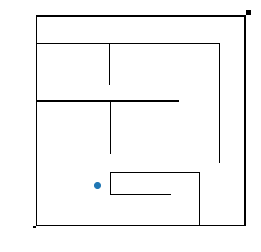

In [61]:
plt.imshow(m, cmap='gray');
plt.axis('off');
(x, y) = pixel(pose, mmd)
plt.plot(x,y,'o');

In [63]:
from geometry_msgs.msg import Twist
from IPython import display

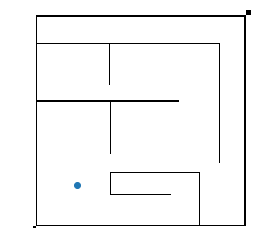

In [67]:
rate = rospy.Rate(10) # 10hz
pub = rospy.Publisher('cmd_vel', Twist, queue_size=10)
twist = Twist()
twist.linear.x = 0.3
for i in range(50):
    pub.publish(twist)
    plt.clf();
    plt.imshow(m, cmap='gray');
    plt.axis('off');
    (x, y) = pixel(pose, mmd)
    plt.plot(x,y,'o');
    display.display(plt.gcf())
    display.clear_output(wait=True)
    rate.sleep()